## Final Analysis and Conclusions

This notebook analyzes the final performance of the two judicial authorship classifiers that I built and then provides some overall conclusions and possible avenues for future work on this project.

As always, I will start by importing the standard packages:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 500

%matplotlib inline

### Create the Models

My first step is to train the final models within this notebook for analysis.  I am using a Logistic Regression Classifier and a Linear Support Vector Classifier, which were the two highest performing models that I trained.  I will use the optimal parameters for each model as determined in the `Machine_Learning` notebook of this project, which can be found in the project's repository:

In [2]:
# load the categorical and continuous variables
df_ml = pd.read_csv('df_ml_1.csv', index_col=0)
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80749 entries, 0 to 80748
Columns: 243 entries, id to subjectivity
dtypes: float64(5), int64(237), object(1)
memory usage: 150.3+ MB


In [3]:
# load the tfidf vectorized vocabulary
df_tfidf = pd.read_csv('df_tfidf_02.csv', index_col=0)
df_tfidf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80749 entries, 0 to 80748
Columns: 3677 entries, 00 to your
dtypes: float64(3677)
memory usage: 2.2 GB


In [4]:
# load the spacy document embeddings vectors
df_spacy = pd.read_csv('df_spacy.csv', index_col=0)
del df_spacy['id']
del df_spacy['judge']
df_spacy.head()

,spacy_0,spacy_1,spacy_2,spacy_3,spacy_4,spacy_5,spacy_6,spacy_7,spacy_8,spacy_9,spacy_10,spacy_11,spacy_12,spacy_13,spacy_14,spacy_15,spacy_16,spacy_17,spacy_18,spacy_19,spacy_20,spacy_21,spacy_22,spacy_23,spacy_24,spacy_25,spacy_26,spacy_27,spacy_28,spacy_29,spacy_30,spacy_31,spacy_32,spacy_33,spacy_34,spacy_35,spacy_36,spacy_37,spacy_38,spacy_39,spacy_40,spacy_41,spacy_42,spacy_43,spacy_44,spacy_45,spacy_46,spacy_47,spacy_48,spacy_49,spacy_50,spacy_51,spacy_52,spacy_53,spacy_54,spacy_55,spacy_56,spacy_57,spacy_58,spacy_59,spacy_60,spacy_61,spacy_62,spacy_63,spacy_64,spacy_65,spacy_66,spacy_67,spacy_68,spacy_69,spacy_70,spacy_71,spacy_72,spacy_73,spacy_74,spacy_75,spacy_76,spacy_77,spacy_78,spacy_79,spacy_80,spacy_81,spacy_82,spacy_83,spacy_84,spacy_85,spacy_86,spacy_87,spacy_88,spacy_89,spacy_90,spacy_91,spacy_92,spacy_93,spacy_94,spacy_95,spacy_96,spacy_97,spacy_98,spacy_99,spacy_100,spacy_101,spacy_102,spacy_103,spacy_104,spacy_105,spacy_106,spacy_107,spacy_108,spacy_109,spacy_110,spacy_111,spacy_112,spacy_113,spacy_114,spacy_115,spacy_116,spacy_117,spacy_118,spacy_119,spacy_120,spacy_121,spacy_122,spacy_123,spacy_124,spacy_125,spacy_126,spacy_127,spacy_128,spacy_129,spacy_130,spacy_131,spacy_132,spacy_133,spacy_134,spacy_135,spacy_136,spacy_137,spacy_138,spacy_139,spacy_140,spacy_141,spacy_142,spacy_143,spacy_144,spacy_145,spacy_146,spacy_147,spacy_148,spacy_149,spacy_150,spacy_151,spacy_152,spacy_153,spacy_154,spacy_155,spacy_156,spacy_157,spacy_158,spacy_159,spacy_160,spacy_161,spacy_162,spacy_163,spacy_164,spacy_165,spacy_166,spacy_167,spacy_168,spacy_169,spacy_170,spacy_171,spacy_172,spacy_173,spacy_174,spacy_175,spacy_176,spacy_177,spacy_178,spacy_179,spacy_180,spacy_181,spacy_182,spacy_183,spacy_184,spacy_185,spacy_186,spacy_187,spacy_188,spacy_189,spacy_190,spacy_191,spacy_192,spacy_193,spacy_194,spacy_195,spacy_196,spacy_197,spacy_198,spacy_199,spacy_200,spacy_201,spacy_202,spacy_203,spacy_204,spacy_205,spacy_206,spacy_207,spacy_208,spacy_209,spacy_210,spacy_211,spacy_212,spacy_213,spacy_214,spacy_215,spacy_216,spacy_217,spacy_218,spacy_219,spacy_220,spacy_221,spacy_222,spacy_223,spacy_224,spacy_225,spacy_226,spacy_227,spacy_228,spacy_229,spacy_230,spacy_231,spacy_232,spacy_233,spacy_234,spacy_235,spacy_236,spacy_237,spacy_238,spacy_239,spacy_240,spacy_241,spacy_242,spacy_243,spacy_244,spacy_245,spacy_246,spacy_247,spacy_248,spacy_249,spacy_250,spacy_251,spacy_252,spacy_253,spacy_254,spacy_255,spacy_256,spacy_257,spacy_258,spacy_259,spacy_260,spacy_261,spacy_262,spacy_263,spacy_264,spacy_265,spacy_266,spacy_267,spacy_268,spacy_269,spacy_270,spacy_271,spacy_272,spacy_273,spacy_274,spacy_275,spacy_276,spacy_277,spacy_278,spacy_279,spacy_280,spacy_281,spacy_282,spacy_283,spacy_284,spacy_285,spacy_286,spacy_287,spacy_288,spacy_289,spacy_290,spacy_291,spacy_292,spacy_293,spacy_294,spacy_295,spacy_296,spacy_297,spacy_298,spacy_299
0,-0.018235,0.141126,-0.077766,-0.041140,-0.001164,-0.014620,0.032196,-0.082413,0.024770,2.116468,-0.192804,0.049729,0.141365,-0.016655,-0.169243,-0.062276,-0.033327,1.070306,-0.115193,-0.033005,0.031212,-0.071661,-0.031958,-0.008337,0.065750,0.043408,-0.052442,-0.077462,-0.011728,-0.059205,-0.040694,0.066518,-0.024291,0.079856,0.069881,-0.082784,-0.011462,-0.000150,-0.071227,-0.070347,-0.024128,0.029422,0.077631,-0.088816,-0.031311,-0.014032,-0.116316,0.063228,-0.001043,0.004374,-0.039147,0.051738,-0.047044,0.039755,-0.034598,0.012541,0.026246,-0.030908,0.002282,-0.062070,-0.011083,-0.026285,0.018029,0.182286,0.006683,-0.005607,0.001397,0.007796,-0.047747,0.035894,0.072234,0.042888,0.101939,-0.074478,0.132518,-0.080515,0.009667,-0.016727,-0.011491,0.109113,0.003445,0.073345,-0.115607,0.012601,0.034442,-0.132139,-0.031270,-0.150163,0.177718,0.060418,-0.068316,-0.028899,0.010970,-0.024210,0.116330,-0.069125,-0.071684,-0.036820,0.014122,0.003569,0.067058,0.043579,-0.044930,0.038197,0.051132,-0.695979,0.049199,0.030121,0.033530,0.001616,0.020328,0.041632,-0.005094,-0.095717,-0.009560,0.008061,0.

In [5]:
# add the tfidf vectorized vocabulary and spacy document embeddings vectors to the df_ml dataframe
df_ml = pd.concat([df_ml, df_tfidf, df_spacy], axis=1)
df_ml.head()

,id,judge,type_concurrence,type_concurring-in-part-and-dissenting-in-part,type_dissent,type_majority,type_rehearing,year_1779,year_1784,year_1787,year_1789,year_1790,year_1791,year_1792,year_1793,year_1794,year_1795,year_1796,year_1797,year_1798,year_1799,year_1800,year_1801,year_1802,year_1803,year_1804,year_1805,year_1806,year_1807,year_1808,year_1809,year_1810,year_1811,year_1812,year_1813,year_1814,year_1815,year_1816,year_1817,year_1818,year_1819,year_1820,year_1821,year_1822,year_1823,year_1824,year_1825,year_1826,year_1827,year_1828,year_1829,year_1830,year_1831,year_1832,year_1833,year_1834,year_1835,year_1836,year_1837,year_1838,year_1839,year_1840,year_1841,year_1842,year_1843,year_1844,year_1845,year_1846,year_1847,year_1848,year_1849,year_1850,year_1851,year_1852,year_1853,year_1854,year_1855,year_1856,year_1857,year_1858,year_1859,year_1860,year_1861,year_1862,year_1863,year_1864,year_1866,year_1867,year_1868,year_1869,year_1870,year_1871,year_1872,year_1873,year_1874,year_1875,year_1876,year_1877,year_1878,year_1879,year_1880,year_1881,year_1882,year_1883,year_1884,year_1885,year_1886,year_1887,year_1888,year_1889,year_1890,year_1891,year_1892,year_1893,year_1894,year_1895,year_1896,year_1897,year_1898,year_1899,year_1900,year_1901,year_1902,year_1903,year_1904,year_1905,year_1906,year_1907,year_1908,year_1909,year_1910,year_1911,year_1912,year_1913,year_1914,year_1915,year_1916,year_1917,year_1918,year_1919,year_1920,year_1921,year_1922,year_1923,year_1924,year_1925,year_1926,year_1927,year_1928,year_1929,year_1930,year_1931,year_1932,year_1933,year_1934,year_1935,year_1936,year_1937,year_1938,year_1939,year_1940,year_1941,year_1942,year_1943,year_1944,year_1945,year_1946,year_1947,year_1948,year_1949,year_1950,year_1951,year_1952,year_1953,year_1954,year_1955,year_1956,year_1957,year_1958,year_1959,year_1960,year_1961,year_1962,year_1963,year_1964,year_1965,year_1966,year_1967,year_1968,year_1969,year_1970,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982,year_1983,year_1984,year_1985,year_1986,year_1987,year_1988,year_1989,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,word_count,sentence_count,avg_sent_length,polarity,subjectivity,00,000,10,100,101,102,103,...,spacy_50,spacy_51,spacy_52,spacy_53,spacy_54,spacy_55,spacy_56,spacy_57,spacy_58,spacy_59,spacy_60,spacy_61,spacy_62,spacy_63,spacy_64,spacy_65,spacy_66,spacy_67,spacy_68,spacy_69,spacy_70,spacy_71,spacy_72,spacy_73,spacy_74,spacy_75,spacy_76,spacy_77,spacy_78,spacy_79,spacy_80,spacy_81,spacy_82,spacy_83,spacy_84,spacy_85,spacy_86,spacy_87,spacy_88,spacy_89,spacy_90,spacy_91,spacy_92,spacy_93,spacy_94,spacy_95,spacy_96,spacy_97,spacy_98,spacy_99,spacy_100,spacy_101,spacy_102,spacy_103,spacy_104,spacy_105,spacy_106,spacy_107,spacy_108,spacy_109,spacy_110,spacy_111,spacy_112,spacy_113,spacy_114,spacy_115,spacy_116,spacy_117,spacy_118,spacy_119,spacy_120,spacy_121,spacy_122,spacy_123,spacy_124,spacy_125,spacy_126,spacy_127,spacy_128,spacy_129,spacy_130,spacy_131,spacy_132,spacy_133,spacy_134,spacy_135,spacy_136,spacy_137,spacy_138,spacy_139,spacy_140,spacy_141,spacy_142,spacy_143,spacy_144,spacy_145,spacy_146,spacy_147,spacy_148,spacy_149,spacy_150,spacy_151,spacy_152,spacy_153,spacy_154,spacy_155,spacy_156,spacy_157,spacy_158,spacy_159,spacy_160,spacy_161,spacy_162,spacy_163,spacy_164,spacy_165,spacy_166,spacy_167,spacy_168,spacy_169,spacy_170,spacy_171,spacy_172,spacy_173,spacy_174,spacy_175,spacy_176,spacy_177,spacy_178,spacy_179,spacy_180,spacy_181,spacy_182,spacy_183,spacy_184,spacy_185,spacy_186,spacy_187,spacy_188,spacy_189,spacy_190,spacy_191,spacy_192,spacy_193,spacy_194,spacy_195,spacy_196,spacy_197,spacy_198,spacy_199,spacy_200,spacy_201,spacy_202,

In [21]:
# divide the data into label and features for use in ml models
X = df_ml.iloc[:, 2:]
y = df_ml.loc[:, 'judge']

# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, stratify=y)

### Logistic Regression Classifier

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100, solver='lbfgs', multi_class='auto', max_iter=1000, random_state=6)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_train_lr = lr.predict(X_train)
print('Accuracy on training set = {}'.format(lr.score(X_train, y_train)))
print('Accuracy on test set = {}'.format(lr.score(X_test, y_test)))

C:\Users\jacob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy on training set = 0.999884414061855
Accuracy on test set = 0.7545571626708936


In [37]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

C:\Users\jacob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                   precision    recall  f1-score   support

            adams       0.90      0.88      0.89       214
            allen       0.85      0.83      0.84       205
           arnold       0.43      0.46      0.44       292
         arrowood       1.00      0.10      0.18        10
             ashe       0.92      0.94      0.93       159
            avery       0.94      0.94      0.94       127
            baley       0.76      0.59      0.67        37
         barnhill       0.90      0.90      0.90       197
           battle       0.95      0.92      0.93       221
          beasley       0.26      0.20      0.23        54
           becton       0.65      0.69      0.67       160
            biggs       0.57      0.24      0.33        17
         billings       0.50      0.27      0.35        11
          bobbitt       0.87      0.88      0.87       196
           boyden       0.83      0.68      0.75        22
            brady       0.65      0.46      0.54       

### Linear SVC 

In [8]:
from sklearn.svm import LinearSVC
svc = LinearSVC(max_iter=1500, random_state=6)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
y_pred_train_svc = svc.predict(X_train)
print('Accuracy on training set = {}'.format(svc.score(X_train, y_train)))
print('Accuracy on test set = {}'.format(svc.score(X_test, y_test)))

Accuracy on training set = 0.9746866795462427
Accuracy on test set = 0.7675847037844263


In [38]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc))

                   precision    recall  f1-score   support

            adams       0.90      0.89      0.89       214
            allen       0.87      0.84      0.86       205
           arnold       0.46      0.41      0.43       292
         arrowood       0.33      0.10      0.15        10
             ashe       0.93      0.95      0.94       159
            avery       0.93      0.96      0.95       127
            baley       0.69      0.59      0.64        37
         barnhill       0.92      0.92      0.92       197
           battle       0.95      0.94      0.94       221
          beasley       0.30      0.15      0.20        54
           becton       0.62      0.79      0.69       160
            biggs       0.67      0.35      0.46        17
         billings       0.67      0.36      0.47        11
          bobbitt       0.84      0.91      0.87       196
           boyden       0.83      0.68      0.75        22
            brady       0.52      0.62      0.57       

The Linear SVC model produced slightly higher overall accuracy of 0.7676 in comparison to the Logistic Regression model's accuracy of 0.7546.

Next, I will save the results into local files for analysis.

In [14]:
# save the predicted author of the test set opinions for each model
df_test = pd.DataFrame(X_test)
df_test['judge'] = y_test
df_test['pred_judge_lr'] = y_pred_lr
df_test['pred_judge_svc'] = y_pred_svc
export_df = df_test.to_csv('df_test_results.csv')
df_test

,type_concurrence,type_concurring-in-part-and-dissenting-in-part,type_dissent,type_majority,type_rehearing,year_1779,year_1784,year_1787,year_1789,year_1790,year_1791,year_1792,year_1793,year_1794,year_1795,year_1796,year_1797,year_1798,year_1799,year_1800,year_1801,year_1802,year_1803,year_1804,year_1805,year_1806,year_1807,year_1808,year_1809,year_1810,year_1811,year_1812,year_1813,year_1814,year_1815,year_1816,year_1817,year_1818,year_1819,year_1820,year_1821,year_1822,year_1823,year_1824,year_1825,year_1826,year_1827,year_1828,year_1829,year_1830,year_1831,year_1832,year_1833,year_1834,year_1835,year_1836,year_1837,year_1838,year_1839,year_1840,year_1841,year_1842,year_1843,year_1844,year_1845,year_1846,year_1847,year_1848,year_1849,year_1850,year_1851,year_1852,year_1853,year_1854,year_1855,year_1856,year_1857,year_1858,year_1859,year_1860,year_1861,year_1862,year_1863,year_1864,year_1866,year_1867,year_1868,year_1869,year_1870,year_1871,year_1872,year_1873,year_1874,year_1875,year_1876,year_1877,year_1878,year_1879,year_1880,year_1881,year_1882,year_1883,year_1884,year_1885,year_1886,year_1887,year_1888,year_1889,year_1890,year_1891,year_1892,year_1893,year_1894,year_1895,year_1896,year_1897,year_1898,year_1899,year_1900,year_1901,year_1902,year_1903,year_1904,year_1905,year_1906,year_1907,year_1908,year_1909,year_1910,year_1911,year_1912,year_1913,year_1914,year_1915,year_1916,year_1917,year_1918,year_1919,year_1920,year_1921,year_1922,year_1923,year_1924,year_1925,year_1926,year_1927,year_1928,year_1929,year_1930,year_1931,year_1932,year_1933,year_1934,year_1935,year_1936,year_1937,year_1938,year_1939,year_1940,year_1941,year_1942,year_1943,year_1944,year_1945,year_1946,year_1947,year_1948,year_1949,year_1950,year_1951,year_1952,year_1953,year_1954,year_1955,year_1956,year_1957,year_1958,year_1959,year_1960,year_1961,year_1962,year_1963,year_1964,year_1965,year_1966,year_1967,year_1968,year_1969,year_1970,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982,year_1983,year_1984,year_1985,year_1986,year_1987,year_1988,year_1989,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,word_count,sentence_count,avg_sent_length,polarity,subjectivity,00,000,10,100,101,102,103,104,105,...,spacy_53,spacy_54,spacy_55,spacy_56,spacy_57,spacy_58,spacy_59,spacy_60,spacy_61,spacy_62,spacy_63,spacy_64,spacy_65,spacy_66,spacy_67,spacy_68,spacy_69,spacy_70,spacy_71,spacy_72,spacy_73,spacy_74,spacy_75,spacy_76,spacy_77,spacy_78,spacy_79,spacy_80,spacy_81,spacy_82,spacy_83,spacy_84,spacy_85,spacy_86,spacy_87,spacy_88,spacy_89,spacy_90,spacy_91,spacy_92,spacy_93,spacy_94,spacy_95,spacy_96,spacy_97,spacy_98,spacy_99,spacy_100,spacy_101,spacy_102,spacy_103,spacy_104,spacy_105,spacy_106,spacy_107,spacy_108,spacy_109,spacy_110,spacy_111,spacy_112,spacy_113,spacy_114,spacy_115,spacy_116,spacy_117,spacy_118,spacy_119,spacy_120,spacy_121,spacy_122,spacy_123,spacy_124,spacy_125,spacy_126,spacy_127,spacy_128,spacy_129,spacy_130,spacy_131,spacy_132,spacy_133,spacy_134,spacy_135,spacy_136,spacy_137,spacy_138,spacy_139,spacy_140,spacy_141,spacy_142,spacy_143,spacy_144,spacy_145,spacy_146,spacy_147,spacy_148,spacy_149,spacy_150,spacy_151,spacy_152,spacy_153,spacy_154,spacy_155,spacy_156,spacy_157,spacy_158,spacy_159,spacy_160,spacy_161,spacy_162,spacy_163,spacy_164,spacy_165,spacy_166,spacy_167,spacy_168,spacy_169,spacy_170,spacy_171,spacy_172,spacy_173,spacy_174,spacy_175,spacy_176,spacy_177,spacy_178,spacy_179,spacy_180,spacy_181,spacy_182,spacy_183,spacy_184,spacy_185,spacy_186,spacy_187,spacy_188,spacy_189,spacy_190,spacy_191,spacy_192,spacy_193,spacy_194,spacy_195,spacy_196,spacy_197,spacy_198,spacy_199,spacy_200,spacy_201,spacy_202,spacy_203,spacy_204,spacy_20

In [16]:
# save the predicted author of the training set opinions for each model
df_train = pd.DataFrame(X_train)
df_train['judge'] = y_train
df_train['pred_judge_lr'] = y_pred_train_lr
df_train['pred_judge_svc'] = y_pred_train_svc
export_df = df_train.to_csv('df_train_results.csv')
df_train

,type_concurrence,type_concurring-in-part-and-dissenting-in-part,type_dissent,type_majority,type_rehearing,year_1779,year_1784,year_1787,year_1789,year_1790,year_1791,year_1792,year_1793,year_1794,year_1795,year_1796,year_1797,year_1798,year_1799,year_1800,year_1801,year_1802,year_1803,year_1804,year_1805,year_1806,year_1807,year_1808,year_1809,year_1810,year_1811,year_1812,year_1813,year_1814,year_1815,year_1816,year_1817,year_1818,year_1819,year_1820,year_1821,year_1822,year_1823,year_1824,year_1825,year_1826,year_1827,year_1828,year_1829,year_1830,year_1831,year_1832,year_1833,year_1834,year_1835,year_1836,year_1837,year_1838,year_1839,year_1840,year_1841,year_1842,year_1843,year_1844,year_1845,year_1846,year_1847,year_1848,year_1849,year_1850,year_1851,year_1852,year_1853,year_1854,year_1855,year_1856,year_1857,year_1858,year_1859,year_1860,year_1861,year_1862,year_1863,year_1864,year_1866,year_1867,year_1868,year_1869,year_1870,year_1871,year_1872,year_1873,year_1874,year_1875,year_1876,year_1877,year_1878,year_1879,year_1880,year_1881,year_1882,year_1883,year_1884,year_1885,year_1886,year_1887,year_1888,year_1889,year_1890,year_1891,year_1892,year_1893,year_1894,year_1895,year_1896,year_1897,year_1898,year_1899,year_1900,year_1901,year_1902,year_1903,year_1904,year_1905,year_1906,year_1907,year_1908,year_1909,year_1910,year_1911,year_1912,year_1913,year_1914,year_1915,year_1916,year_1917,year_1918,year_1919,year_1920,year_1921,year_1922,year_1923,year_1924,year_1925,year_1926,year_1927,year_1928,year_1929,year_1930,year_1931,year_1932,year_1933,year_1934,year_1935,year_1936,year_1937,year_1938,year_1939,year_1940,year_1941,year_1942,year_1943,year_1944,year_1945,year_1946,year_1947,year_1948,year_1949,year_1950,year_1951,year_1952,year_1953,year_1954,year_1955,year_1956,year_1957,year_1958,year_1959,year_1960,year_1961,year_1962,year_1963,year_1964,year_1965,year_1966,year_1967,year_1968,year_1969,year_1970,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982,year_1983,year_1984,year_1985,year_1986,year_1987,year_1988,year_1989,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,word_count,sentence_count,avg_sent_length,polarity,subjectivity,00,000,10,100,101,102,103,104,105,...,spacy_53,spacy_54,spacy_55,spacy_56,spacy_57,spacy_58,spacy_59,spacy_60,spacy_61,spacy_62,spacy_63,spacy_64,spacy_65,spacy_66,spacy_67,spacy_68,spacy_69,spacy_70,spacy_71,spacy_72,spacy_73,spacy_74,spacy_75,spacy_76,spacy_77,spacy_78,spacy_79,spacy_80,spacy_81,spacy_82,spacy_83,spacy_84,spacy_85,spacy_86,spacy_87,spacy_88,spacy_89,spacy_90,spacy_91,spacy_92,spacy_93,spacy_94,spacy_95,spacy_96,spacy_97,spacy_98,spacy_99,spacy_100,spacy_101,spacy_102,spacy_103,spacy_104,spacy_105,spacy_106,spacy_107,spacy_108,spacy_109,spacy_110,spacy_111,spacy_112,spacy_113,spacy_114,spacy_115,spacy_116,spacy_117,spacy_118,spacy_119,spacy_120,spacy_121,spacy_122,spacy_123,spacy_124,spacy_125,spacy_126,spacy_127,spacy_128,spacy_129,spacy_130,spacy_131,spacy_132,spacy_133,spacy_134,spacy_135,spacy_136,spacy_137,spacy_138,spacy_139,spacy_140,spacy_141,spacy_142,spacy_143,spacy_144,spacy_145,spacy_146,spacy_147,spacy_148,spacy_149,spacy_150,spacy_151,spacy_152,spacy_153,spacy_154,spacy_155,spacy_156,spacy_157,spacy_158,spacy_159,spacy_160,spacy_161,spacy_162,spacy_163,spacy_164,spacy_165,spacy_166,spacy_167,spacy_168,spacy_169,spacy_170,spacy_171,spacy_172,spacy_173,spacy_174,spacy_175,spacy_176,spacy_177,spacy_178,spacy_179,spacy_180,spacy_181,spacy_182,spacy_183,spacy_184,spacy_185,spacy_186,spacy_187,spacy_188,spacy_189,spacy_190,spacy_191,spacy_192,spacy_193,spacy_194,spacy_195,spacy_196,spacy_197,spacy_198,spacy_199,spacy_200,spacy_201,spacy_202,spacy_203,spacy_204,spacy_20

In [17]:
# save the logistic regression coefficient values for each judge
df_lr_coef = pd.DataFrame(lr.coef_, index=lr.classes_, columns=df_ml.columns[2:])
export_df = df_lr_coef.to_csv('df_lr_coef.csv')
df_lr_coef

,type_concurrence,type_concurring-in-part-and-dissenting-in-part,type_dissent,type_majority,type_rehearing,year_1779,year_1784,year_1787,year_1789,year_1790,year_1791,year_1792,year_1793,year_1794,year_1795,year_1796,year_1797,year_1798,year_1799,year_1800,year_1801,year_1802,year_1803,year_1804,year_1805,year_1806,year_1807,year_1808,year_1809,year_1810,year_1811,year_1812,year_1813,year_1814,year_1815,year_1816,year_1817,year_1818,year_1819,year_1820,year_1821,year_1822,year_1823,year_1824,year_1825,year_1826,year_1827,year_1828,year_1829,year_1830,year_1831,year_1832,year_1833,year_1834,year_1835,year_1836,year_1837,year_1838,year_1839,year_1840,year_1841,year_1842,year_1843,year_1844,year_1845,year_1846,year_1847,year_1848,year_1849,year_1850,year_1851,year_1852,year_1853,year_1854,year_1855,year_1856,year_1857,year_1858,year_1859,year_1860,year_1861,year_1862,year_1863,year_1864,year_1866,year_1867,year_1868,year_1869,year_1870,year_1871,year_1872,year_1873,year_1874,year_1875,year_1876,year_1877,year_1878,year_1879,year_1880,year_1881,year_1882,year_1883,year_1884,year_1885,year_1886,year_1887,year_1888,year_1889,year_1890,year_1891,year_1892,year_1893,year_1894,year_1895,year_1896,year_1897,year_1898,year_1899,year_1900,year_1901,year_1902,year_1903,year_1904,year_1905,year_1906,year_1907,year_1908,year_1909,year_1910,year_1911,year_1912,year_1913,year_1914,year_1915,year_1916,year_1917,year_1918,year_1919,year_1920,year_1921,year_1922,year_1923,year_1924,year_1925,year_1926,year_1927,year_1928,year_1929,year_1930,year_1931,year_1932,year_1933,year_1934,year_1935,year_1936,year_1937,year_1938,year_1939,year_1940,year_1941,year_1942,year_1943,year_1944,year_1945,year_1946,year_1947,year_1948,year_1949,year_1950,year_1951,year_1952,year_1953,year_1954,year_1955,year_1956,year_1957,year_1958,year_1959,year_1960,year_1961,year_1962,year_1963,year_1964,year_1965,year_1966,year_1967,year_1968,year_1969,year_1970,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982,year_1983,year_1984,year_1985,year_1986,year_1987,year_1988,year_1989,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,word_count,sentence_count,avg_sent_length,polarity,subjectivity,00,000,10,100,101,102,103,104,105,...,spacy_50,spacy_51,spacy_52,spacy_53,spacy_54,spacy_55,spacy_56,spacy_57,spacy_58,spacy_59,spacy_60,spacy_61,spacy_62,spacy_63,spacy_64,spacy_65,spacy_66,spacy_67,spacy_68,spacy_69,spacy_70,spacy_71,spacy_72,spacy_73,spacy_74,spacy_75,spacy_76,spacy_77,spacy_78,spacy_79,spacy_80,spacy_81,spacy_82,spacy_83,spacy_84,spacy_85,spacy_86,spacy_87,spacy_88,spacy_89,spacy_90,spacy_91,spacy_92,spacy_93,spacy_94,spacy_95,spacy_96,spacy_97,spacy_98,spacy_99,spacy_100,spacy_101,spacy_102,spacy_103,spacy_104,spacy_105,spacy_106,spacy_107,spacy_108,spacy_109,spacy_110,spacy_111,spacy_112,spacy_113,spacy_114,spacy_115,spacy_116,spacy_117,spacy_118,spacy_119,spacy_120,spacy_121,spacy_122,spacy_123,spacy_124,spacy_125,spacy_126,spacy_127,spacy_128,spacy_129,spacy_130,spacy_131,spacy_132,spacy_133,spacy_134,spacy_135,spacy_136,spacy_137,spacy_138,spacy_139,spacy_140,spacy_141,spacy_142,spacy_143,spacy_144,spacy_145,spacy_146,spacy_147,spacy_148,spacy_149,spacy_150,spacy_151,spacy_152,spacy_153,spacy_154,spacy_155,spacy_156,spacy_157,spacy_158,spacy_159,spacy_160,spacy_161,spacy_162,spacy_163,spacy_164,spacy_165,spacy_166,spacy_167,spacy_168,spacy_169,spacy_170,spacy_171,spacy_172,spacy_173,spacy_174,spacy_175,spacy_176,spacy_177,spacy_178,spacy_179,spacy_180,spacy_181,spacy_182,spacy_183,spacy_184,spacy_185,spacy_186,spacy_187,spacy_188,spacy_189,spacy_190,spacy_191,spacy_192,spacy_193,spacy_194,spacy_195,spacy_196,spacy_197,spacy_198,spacy_199,spacy_200,spacy_201,spacy_202,s

In [18]:
# save the linear SVC coefficient values for each judge
df_svc_coef = pd.DataFrame(svc.coef_, index=svc.classes_, columns=df_ml.columns[2:])
export_df = df_svc_coef.to_csv('df_svc_coef.csv')
df_svc_coef

,type_concurrence,type_concurring-in-part-and-dissenting-in-part,type_dissent,type_majority,type_rehearing,year_1779,year_1784,year_1787,year_1789,year_1790,year_1791,year_1792,year_1793,year_1794,year_1795,year_1796,year_1797,year_1798,year_1799,year_1800,year_1801,year_1802,year_1803,year_1804,year_1805,year_1806,year_1807,year_1808,year_1809,year_1810,year_1811,year_1812,year_1813,year_1814,year_1815,year_1816,year_1817,year_1818,year_1819,year_1820,year_1821,year_1822,year_1823,year_1824,year_1825,year_1826,year_1827,year_1828,year_1829,year_1830,year_1831,year_1832,year_1833,year_1834,year_1835,year_1836,year_1837,year_1838,year_1839,year_1840,year_1841,year_1842,year_1843,year_1844,year_1845,year_1846,year_1847,year_1848,year_1849,year_1850,year_1851,year_1852,year_1853,year_1854,year_1855,year_1856,year_1857,year_1858,year_1859,year_1860,year_1861,year_1862,year_1863,year_1864,year_1866,year_1867,year_1868,year_1869,year_1870,year_1871,year_1872,year_1873,year_1874,year_1875,year_1876,year_1877,year_1878,year_1879,year_1880,year_1881,year_1882,year_1883,year_1884,year_1885,year_1886,year_1887,year_1888,year_1889,year_1890,year_1891,year_1892,year_1893,year_1894,year_1895,year_1896,year_1897,year_1898,year_1899,year_1900,year_1901,year_1902,year_1903,year_1904,year_1905,year_1906,year_1907,year_1908,year_1909,year_1910,year_1911,year_1912,year_1913,year_1914,year_1915,year_1916,year_1917,year_1918,year_1919,year_1920,year_1921,year_1922,year_1923,year_1924,year_1925,year_1926,year_1927,year_1928,year_1929,year_1930,year_1931,year_1932,year_1933,year_1934,year_1935,year_1936,year_1937,year_1938,year_1939,year_1940,year_1941,year_1942,year_1943,year_1944,year_1945,year_1946,year_1947,year_1948,year_1949,year_1950,year_1951,year_1952,year_1953,year_1954,year_1955,year_1956,year_1957,year_1958,year_1959,year_1960,year_1961,year_1962,year_1963,year_1964,year_1965,year_1966,year_1967,year_1968,year_1969,year_1970,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982,year_1983,year_1984,year_1985,year_1986,year_1987,year_1988,year_1989,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,word_count,sentence_count,avg_sent_length,polarity,subjectivity,00,000,10,100,101,102,103,104,105,...,spacy_50,spacy_51,spacy_52,spacy_53,spacy_54,spacy_55,spacy_56,spacy_57,spacy_58,spacy_59,spacy_60,spacy_61,spacy_62,spacy_63,spacy_64,spacy_65,spacy_66,spacy_67,spacy_68,spacy_69,spacy_70,spacy_71,spacy_72,spacy_73,spacy_74,spacy_75,spacy_76,spacy_77,spacy_78,spacy_79,spacy_80,spacy_81,spacy_82,spacy_83,spacy_84,spacy_85,spacy_86,spacy_87,spacy_88,spacy_89,spacy_90,spacy_91,spacy_92,spacy_93,spacy_94,spacy_95,spacy_96,spacy_97,spacy_98,spacy_99,spacy_100,spacy_101,spacy_102,spacy_103,spacy_104,spacy_105,spacy_106,spacy_107,spacy_108,spacy_109,spacy_110,spacy_111,spacy_112,spacy_113,spacy_114,spacy_115,spacy_116,spacy_117,spacy_118,spacy_119,spacy_120,spacy_121,spacy_122,spacy_123,spacy_124,spacy_125,spacy_126,spacy_127,spacy_128,spacy_129,spacy_130,spacy_131,spacy_132,spacy_133,spacy_134,spacy_135,spacy_136,spacy_137,spacy_138,spacy_139,spacy_140,spacy_141,spacy_142,spacy_143,spacy_144,spacy_145,spacy_146,spacy_147,spacy_148,spacy_149,spacy_150,spacy_151,spacy_152,spacy_153,spacy_154,spacy_155,spacy_156,spacy_157,spacy_158,spacy_159,spacy_160,spacy_161,spacy_162,spacy_163,spacy_164,spacy_165,spacy_166,spacy_167,spacy_168,spacy_169,spacy_170,spacy_171,spacy_172,spacy_173,spacy_174,spacy_175,spacy_176,spacy_177,spacy_178,spacy_179,spacy_180,spacy_181,spacy_182,spacy_183,spacy_184,spacy_185,spacy_186,spacy_187,spacy_188,spacy_189,spacy_190,spacy_191,spacy_192,spacy_193,spacy_194,spacy_195,spacy_196,spacy_197,spacy_198,spacy_199,spacy_200,spacy_201,spacy_202,s

In [ ]:
type(X_train)

In [23]:
# save the logistic regression model predicted probabilities for each opinion in test set
y_pred_proba_lr = lr.predict_proba(X_test)
df_pred_proba_lr = pd.DataFrame(y_pred_proba_lr, index=df_test.index, columns=lr.classes_)
export_df = df_pred_proba_lr.to_csv('df_lr_pred_proba_test.csv')
df_pred_proba_lr

,adams,allen,arnold,arrowood,ashe,avery,baley,barnhill,battle,beasley,becton,biggs,billings,bobbitt,boyden,brady,branch,braswell,britt,brock,brogden,brown,bryant,burwell,butterfield,bynum,calabria,cameron,campbell,carlton,carson,chase,clark_edward,clark_walter,clarkson,colcock,connor,cook,cooke,copeland,cozort,crew,daniel,davis,denny,devin,dick,dillard,dillon,doderidge,doderidge_jones,douglas,duncan,eagles,edmunds,elmore,ervin,erwin,evans,exum,faircloth,freeman,frye,fuller,furches,gaston,geer,grahall,greene,hall,haywood,hedrick,henderson,higgins,hill,hoke,horton,hudson,hunter,huskins,jackson,john,johnson_clifton,johnson_jefferson,johnston,johnston_macay,jones,lake,levinson,lewis,locke,lowrie,macrae,mallard,manly,manning,marshall,martin_harry,martin_john,martin_mark,martin_robert,mccoy,mccrodden,mccullough,mcgee,merrimon,meyer,mitchell,montgomery,moore,morgan,morris,nash,newby,nott,oneall,orr,parker_robert,parker_sarah,pearson,per_curiam,phillips,pless,reade,richardson,rodman,rodman_jr,ruffin,ruffin_jr,schenck,seawell,settle,sharp,shepherd,smith_donald,smith_william,stacy,stagy,steelman,stephens,stroud,taylor,taylorhall,thigpen,thomas,thompson,thornburg,timmonsgoodson,toomer,tyson,valentine,varser,vaughn,wainwright,walker_platt,walker_ralph,webb,wells,whichard,whitlock,williams,winborne,wynn
44603,9.754365e-02,8.940263e-07,5.371960e-08,3.390002e-06,2.165445e-05,1.313819e-05,4.913837e-06,7.075539e-05,3.111697e-04,8.255789e-07,2.739773e-07,2.683908e-07,2.598831e-07,4.758794e-05,4.622784e-06,3.336150e-06,7.717983e-06,8.996470e-07,1.090242e-05,1.171193e-07,3.937166e-02,1.032174e-05,1.783933e-05,4.522436e-06,1.034877e-06,8.822216e-06,1.533349e-07,2.234790e-07,2.506819e-07,1.263769e-07,1.136433e-06,6.310524e-07,3.424771e-07,3.442127e-05,8.365143e-01,2.466783e-05,1.961249e-02,5.975078e-06,8.254868e-06,8.549680e-07,4.123446e-08,1.475426e-06,5.191039e-06,1.734622e-06,3.261705e-04,2.963160e-05,1.415106e-06,2.914868e-06,8.436924e-07,3.852152e-06,3.480074e-06,2.332407e-05,9.429097e-06,4.715840e-09,8.083501e-07,1.206161e-08,2.349694e-05,4.067198e-06,1.495449e-06,1.322972e-04,4.495410e-07,7.811994e-06,1.493232e-06,5.403018e-07,8.235134e-06,6.722855e-06,1.266126e-05,2.252257e-07,7.869958e-08,1.010247e-05,7.633231e-06,6.696980e-06,1.143844e-06,2.900790e-06,2.554854e-06,1.158263e-04,3.931670e-07,4.992816e-06,1.681871e-06,2.984945e-06,1.240628e-05,1.157256e-05,8.826130e-06,7.767611e-06,7.371382e-06,6.964756e-07,5.188442e-06,2.382544e-06,9.395928e-07,2.670673e-07,1.174588e-05,3.314270e-06,1.915366e-06,1.545039e-06,1.384850e-06,1.215185e-05,4.311785e-06,4.373967e-06,1.544085e-06,2.601122e-05,8.575706e-07,7.313807e-06,5.495820e-06,1.754357e-07,6.604528e-08,2.529753e-06,4.734006e-07,1.208188e-06,1.969027e-05,1.979303e-06,3.750271e-07,5.485656e-06,3.310112e-05,6.726821e-07,2.769382e-06,2.898536e-06,3.829069e-05,4.425839e-05,2.600888e-06,2.936074e-06,8.269907e-05,1.244932e-07,1.605445e-06,2.908706e-07,1.345212e-06,8.966023e-05,1.766535e-05,5.711801e-07,1.568986e-06,5.633528e-07,1.565660e-05,5.182154e-06,4.122449e-05,3.219218e-05,1.092403e-06,1.824689e-06,2.822738e-03,1.900099e-03,3.494133e-06,1.760535e-06,5.593092e-06,1.825067e-05,1.391851e-05,6.695320e-06,1.142822e-05,1.404694e-06,6.651531e-07,1.518342e-07,1.513636e-06,6.557500e-10,1.052565e-05,2.673543e-06,1.139799e-06,9.094178e-07,1.228467e-04,1.339736e-07,7.030456e-07,1.105948e-06,9.242642e-07,5.186734e-06,2.495695e-05,1.724149e-05,4.901919e-07
8927,1.759691e-05,3.539236e-06,6.061692e-04,2.919109e-06,1.160778e-06,4.017757e-05,1.771773e-07,1.472803e-05,1.917018e-05,1.762894e-03,1.388769e-04,2.786552e-06,1.575883e-05,3.570766e-05,8.411142e-07,2.193048e-06,5.394972e-06,1.994519e-06,4.657871e-06,1.346223e-05,7.897375e-05,2.977393e-06,1.365137e-02,4.014148e-06,6.653578e-06,1.448399e-05,1.169969e-04,2.628590e-06,3.378817e-06,8.154050e-05,6.638266e-07,3.614926e-06,3.158205e-07,9.956611e-07,6.042297e-06,6.321280e-06,1.434481e-06,4.411714e-07,2.946697e-06,4.332649e-06,3.950826e-06,1.194401e-06,1.040408e-05

In [28]:
# save the logistic regression model predicted probabilities for each opinion in training set
y_pred_proba_lr_train = lr.predict_proba(X_train)
df_pred_proba_lr_train = pd.DataFrame(y_pred_proba_lr_train, index=df_train.index, columns=lr.classes_)
export_df = df_pred_proba_lr_train.to_csv('df_lr_pred_proba_train.csv')
df_pred_proba_lr_train

,adams,allen,arnold,arrowood,ashe,avery,baley,barnhill,battle,beasley,becton,biggs,billings,bobbitt,boyden,brady,branch,braswell,britt,brock,brogden,brown,bryant,burwell,butterfield,bynum,calabria,cameron,campbell,carlton,carson,chase,clark_edward,clark_walter,clarkson,colcock,connor,cook,cooke,copeland,cozort,crew,daniel,davis,denny,devin,dick,dillard,dillon,doderidge,doderidge_jones,douglas,duncan,eagles,edmunds,elmore,ervin,erwin,evans,exum,faircloth,freeman,frye,fuller,furches,gaston,geer,grahall,greene,hall,haywood,hedrick,henderson,higgins,hill,hoke,horton,hudson,hunter,huskins,jackson,john,johnson_clifton,johnson_jefferson,johnston,johnston_macay,jones,lake,levinson,lewis,locke,lowrie,macrae,mallard,manly,manning,marshall,martin_harry,martin_john,martin_mark,martin_robert,mccoy,mccrodden,mccullough,mcgee,merrimon,meyer,mitchell,montgomery,moore,morgan,morris,nash,newby,nott,oneall,orr,parker_robert,parker_sarah,pearson,per_curiam,phillips,pless,reade,richardson,rodman,rodman_jr,ruffin,ruffin_jr,schenck,seawell,settle,sharp,shepherd,smith_donald,smith_william,stacy,stagy,steelman,stephens,stroud,taylor,taylorhall,thigpen,thomas,thompson,thornburg,timmonsgoodson,toomer,tyson,valentine,varser,vaughn,wainwright,walker_platt,walker_ralph,webb,wells,whichard,whitlock,williams,winborne,wynn
14054,2.161897e-05,3.241644e-07,1.648191e-03,1.269948e-06,1.653832e-06,3.279260e-06,6.726372e-07,1.280407e-04,4.241044e-06,1.904861e-05,5.181663e-05,6.286577e-06,1.428119e-06,5.242352e-06,4.609634e-06,1.662819e-05,1.101809e-04,1.847039e-07,5.373723e-05,6.211234e-07,8.459109e-06,3.339210e-05,4.676960e-05,7.737484e-07,7.406810e-05,1.673230e-06,1.668520e-05,4.376174e-06,3.149867e-04,3.245411e-06,1.264421e-06,1.195519e-06,5.630187e-06,1.003417e-07,1.799505e-05,2.888338e-06,7.477111e-07,5.306368e-07,4.988329e-07,4.320839e-05,1.101895e-03,1.314196e-06,7.367277e-06,3.031816e-06,2.905606e-06,3.545976e-07,3.640332e-06,7.695139e-06,8.789164e-06,3.545986e-06,1.962939e-06,1.954304e-05,5.613653e-03,5.384345e-04,1.280573e-06,9.395415e-07,3.545974e-06,7.227505e-06,2.720297e-06,9.328424e-04,6.197501e-06,2.020643e-06,2.435722e-03,4.531875e-06,1.028336e-06,1.070515e-05,6.679650e-07,1.987097e-05,4.142487e-03,1.115652e-06,2.653567e-06,7.196157e-02,1.306504e-06,2.955271e-05,2.135120e-05,2.238846e-06,1.001455e-05,1.848307e-07,3.694233e-06,1.455997e-04,2.831671e-06,3.224464e-06,5.365840e-04,8.095315e-06,2.345245e-06,1.345978e-06,6.033359e-07,1.580009e-06,7.560226e-05,2.938937e-03,2.265452e-05,6.967167e-06,1.065700e-06,7.099874e-07,1.069640e-05,2.210273e-06,5.103451e-06,3.133067e-03,9.755675e-07,2.578117e-07,9.123215e-06,2.803531e-06,2.552719e-05,1.388123e-05,2.067774e-06,1.779847e-05,2.649023e-04,4.616733e-04,1.702548e-08,7.838564e-05,2.079912e-06,1.073304e-05,5.934779e-06,3.480309e-06,1.117239e-05,1.466391e-06,2.356192e-02,1.216953e-07,4.059888e-02,1.662570e-06,3.320435e-06,2.045924e-04,1.382623e-06,8.678139e-07,2.478694e-06,6.379288e-06,4.200135e-06,2.910829e-07,1.074377e-06,1.066248e-05,8.025349e-05,9.113782e-06,9.293741e-06,1.918663e-06,4.064742e-05,1.517111e-05,6.356211e-05,3.449399e-05,1.201506e-05,9.013088e-06,4.999821e-06,2.600088e-06,2.486473e-06,7.102744e-06,4.577151e-06,1.512902e-06,4.006430e-06,7.708433e-05,4.121418e-06,7.938787e-07,5.036520e-06,1.509434e-07,1.054433e-04,3.845338e-06,1.205833e-07,9.730892e-05,2.599327e-04,8.365247e-01,7.846624e-04,1.622761e-06,4.035631e-06,2.883829e-06,3.895497e-05
5534,2.912163e-07,2.305447e-07,9.593551e-07,4.676152e-04,3.779296e-06,1.125290e-05,8.528270e-07,7.806113e-07,2.282365e-05,1.885438e-06,6.071170e-07,1.334817e-05,3.338134e-06,4.789771e-05,2.224549e-05,9.214480e-01,1.908920e-05,1.325864e-06,1.276137e-04,1.095692e-06,1.620434e-05,2.649583e-06,6.026703e-03,7.457904e-07,2.765814e-05,6.960519e-06,3.994241e-04,2.224802e-06,2.161190e-06,1.326814e-05,2.162857e-07,1.814380e-06,2.356254e-08,2.366713e-06,5.840547e-06,1.024749e-06,2.584194e-07,6.768525e-06,1.049105e-05,8.511466e-05,4.519159e-08,1.394098e-06,1.264073e-06

In [25]:
# save the linear SVC model decision function values for each opinion in the test set
y_pred_proba_svc = svc.decision_function(X_test)
df_pred_proba_svc = pd.DataFrame(y_pred_proba_svc, index=df_test.index, columns=svc.classes_)
export_df = df_pred_proba_svc.to_csv("df_svc_dec_func_test.csv")
df_pred_proba_svc

,adams,allen,arnold,arrowood,ashe,avery,baley,barnhill,battle,beasley,becton,biggs,billings,bobbitt,boyden,brady,branch,braswell,britt,brock,brogden,brown,bryant,burwell,butterfield,bynum,calabria,cameron,campbell,carlton,carson,chase,clark_edward,clark_walter,clarkson,colcock,connor,cook,cooke,copeland,cozort,crew,daniel,davis,denny,devin,dick,dillard,dillon,doderidge,doderidge_jones,douglas,duncan,eagles,edmunds,elmore,ervin,erwin,evans,exum,faircloth,freeman,frye,fuller,furches,gaston,geer,grahall,greene,hall,haywood,hedrick,henderson,higgins,hill,hoke,horton,hudson,hunter,huskins,jackson,john,johnson_clifton,johnson_jefferson,johnston,johnston_macay,jones,lake,levinson,lewis,locke,lowrie,macrae,mallard,manly,manning,marshall,martin_harry,martin_john,martin_mark,martin_robert,mccoy,mccrodden,mccullough,mcgee,merrimon,meyer,mitchell,montgomery,moore,morgan,morris,nash,newby,nott,oneall,orr,parker_robert,parker_sarah,pearson,per_curiam,phillips,pless,reade,richardson,rodman,rodman_jr,ruffin,ruffin_jr,schenck,seawell,settle,sharp,shepherd,smith_donald,smith_william,stacy,stagy,steelman,stephens,stroud,taylor,taylorhall,thigpen,thomas,thompson,thornburg,timmonsgoodson,toomer,tyson,valentine,varser,vaughn,wainwright,walker_platt,walker_ralph,webb,wells,whichard,whitlock,williams,winborne,wynn
44603,-0.539157,-2.873770,-2.576759,-1.429182,-1.985384,-2.115081,-1.843975,-1.698995,-1.244164,-1.977249,-2.647146,-1.926290,-2.048209,-1.675169,-2.158365,-1.737546,-1.720722,-1.980083,-1.807182,-2.580523,-0.642712,-2.375255,-1.477563,-1.850591,-1.678930,-2.151025,-2.202652,-2.153570,-2.418700,-2.103156,-1.695228,-1.611422,-2.171895,-2.043668,0.295669,-1.543695,-0.787103,-1.720202,-1.658023,-1.842219,-2.666343,-1.616721,-2.188284,-2.162659,-1.397494,-1.930968,-2.330531,-2.187718,-1.808588,-1.759920,-1.307254,-1.984753,-1.362257,-3.095643,-1.865795,-2.755863,-1.785595,-1.804410,-1.490613,-1.262740,-3.060385,-1.294353,-2.061004,-1.502810,-1.899377,-1.959814,-1.826479,-2.331612,-2.793053,-1.638558,-1.274966,-2.241787,-2.429442,-2.412949,-1.935318,-1.825698,-2.081902,-1.788016,-1.996808,-1.888798,-1.590367,-1.597797,-1.719298,-1.905777,-1.427303,-1.394231,-1.366764,-2.192682,-1.995064,-2.154849,-1.435344,-1.319176,-2.283618,-2.147391,-2.404404,-2.037072,-1.416695,-1.759500,-1.821384,-1.839111,-2.094555,-1.399797,-1.610111,-2.124774,-2.398693,-2.411609,-2.050048,-2.204463,-2.167851,-2.177039,-1.583320,-1.885668,-1.835397,-1.962230,-1.875467,-1.431158,-1.770509,-1.899184,-1.829510,-2.371000,-2.044883,-2.422203,-2.122489,-3.239363,-1.596980,-1.256375,-1.895107,-2.757637,-2.611965,-2.918719,-2.002956,-2.230100,-1.629629,-1.857426,-1.817659,-2.468059,-1.214345,-1.128737,-1.895168,-1.736482,-2.252649,-1.378270,-1.440372,-1.508575,-1.473001,-1.497272,-1.545690,-2.289680,-1.503475,-3.582448,-1.539035,-1.746092,-2.450928,-1.770817,-1.845178,-2.179388,-2.227796,-2.392826,-2.131731,-1.282492,-1.150189,-1.892634,-2.214648
8927,-2.064308,-2.553897,-1.373708,-1.679953,-3.109180,-1.514486,-2.644715,-1.958653,-1.945897,-1.205469,-1.734881,-1.832608,-1.631991,-1.712521,-2.252322,-1.988071,-2.062796,-1.942020,-2.030863,-2.165775,-1.614320,-2.754578,-0.906380,-1.948501,-1.974430,-1.885102,-1.548263,-1.762732,-2.163567,-1.273225,-1.881468,-1.357494,-2.814841,-3.058634,-2.667733,-1.625885,-2.714428,-2.171807,-1.471312,-1.857896,-2.640288,-1.598416,-2.176185,-1.992067,-2.597202,-2.059191,-1.888745,-2.024365,-1.737773,-1.627185,-1.330006,-1.516017,-1.632489,-2.290160,-1.050882,-0.816536,-1.259414,-2.015468,-1.406765,-1.808940,-2.233041,-1.476572,-2.055818,-1.594267,-3.354529,-1.841186,-1.212087,-1.741165,-2.555189,-2.776740,-1.318222,-2.859258,-2.176978,-2.351336,-2.127637,-2.437072,-2.279741,-1.218241,-0.784528,-1.693091,-1.004495,-1.740249,-2.577858,-1.545409,-1.295538,-1.407323,-1.678646,-2.731213,-1.639259,-1.698700,-1.400709,-1.362869,-2.404286,-2.013248,-1.932556,-2.146708,-1.455831,-1.758038,-2.232729,-1.218507,-2.105744,-1.402197,-1.890518,-0.877636,-1.72036

In [29]:
# save the linear SVC model decision function values for each opinion in the training set
y_pred_proba_svc_train = svc.decision_function(X_train)
df_pred_proba_svc_train = pd.DataFrame(y_pred_proba_svc_train, index=df_train.index, columns=svc.classes_)
export_df = df_pred_proba_svc_train.to_csv("df_svc_dec_func_train.csv")
df_pred_proba_svc_train

,adams,allen,arnold,arrowood,ashe,avery,baley,barnhill,battle,beasley,becton,biggs,billings,bobbitt,boyden,brady,branch,braswell,britt,brock,brogden,brown,bryant,burwell,butterfield,bynum,calabria,cameron,campbell,carlton,carson,chase,clark_edward,clark_walter,clarkson,colcock,connor,cook,cooke,copeland,cozort,crew,daniel,davis,denny,devin,dick,dillard,dillon,doderidge,doderidge_jones,douglas,duncan,eagles,edmunds,elmore,ervin,erwin,evans,exum,faircloth,freeman,frye,fuller,furches,gaston,geer,grahall,greene,hall,haywood,hedrick,henderson,higgins,hill,hoke,horton,hudson,hunter,huskins,jackson,john,johnson_clifton,johnson_jefferson,johnston,johnston_macay,jones,lake,levinson,lewis,locke,lowrie,macrae,mallard,manly,manning,marshall,martin_harry,martin_john,martin_mark,martin_robert,mccoy,mccrodden,mccullough,mcgee,merrimon,meyer,mitchell,montgomery,moore,morgan,morris,nash,newby,nott,oneall,orr,parker_robert,parker_sarah,pearson,per_curiam,phillips,pless,reade,richardson,rodman,rodman_jr,ruffin,ruffin_jr,schenck,seawell,settle,sharp,shepherd,smith_donald,smith_william,stacy,stagy,steelman,stephens,stroud,taylor,taylorhall,thigpen,thomas,thompson,thornburg,timmonsgoodson,toomer,tyson,valentine,varser,vaughn,wainwright,walker_platt,walker_ralph,webb,wells,whichard,whitlock,williams,winborne,wynn
14054,-1.606126,-3.129862,-1.027787,-1.726381,-2.799617,-2.105849,-2.545950,-1.840180,-2.219716,-1.419846,-1.863961,-1.690679,-1.934010,-2.026763,-1.955576,-1.668322,-1.545365,-2.424300,-1.772067,-2.539072,-2.110616,-1.670113,-1.572990,-2.243068,-1.467306,-2.348042,-1.643378,-1.694068,-1.549286,-1.832231,-2.023944,-1.486562,-2.300704,-3.298456,-1.924254,-1.789375,-2.910769,-2.173853,-1.586248,-1.601613,-1.298275,-1.732738,-2.013155,-2.483460,-2.443428,-2.661179,-2.149182,-2.372580,-1.775215,-1.705902,-1.264033,-1.683613,-0.997861,-1.290713,-1.838153,-2.114531,-2.170741,-2.000334,-1.335368,-1.264524,-2.009536,-1.669393,-0.993353,-1.416408,-2.628940,-1.991035,-2.262679,-1.866882,-0.944394,-2.364522,-1.479504,-0.548836,-2.168182,-1.875352,-1.551900,-2.121274,-1.753202,-2.252377,-1.982252,-1.474183,-1.898238,-2.080347,-1.278332,-1.864557,-1.645468,-1.473556,-2.020629,-2.368420,-1.444191,-1.038939,-1.198446,-1.262667,-2.309789,-2.534710,-1.897100,-2.054295,-1.425150,-1.121378,-2.174152,-2.409864,-2.084283,-1.454501,-1.624185,-1.587164,-1.970158,-2.054304,-1.451900,-1.374541,-3.204261,-1.731579,-1.577945,-1.856397,-2.101602,-1.902504,-1.663100,-1.481301,-0.750654,-3.139225,-0.738941,-2.759143,-2.170270,-1.456472,-2.489865,-2.766557,-1.579596,-1.918904,-2.487480,-3.015823,-2.768509,-2.113709,-1.659258,-1.928768,-2.086680,-2.377444,-1.728369,-2.180341,-1.614861,-1.342635,-1.720839,-1.601219,-2.247321,-2.061025,-1.590841,-1.653414,-1.932416,-1.570025,-1.493641,-1.586633,-1.319012,-2.709436,-1.916280,-1.955300,-1.544468,-1.824417,-3.028029,-1.568786,-1.439523,-0.118858,-1.255940,-1.370742,-1.423462,-2.377374,-1.866700
5534,-2.777163,-3.039441,-2.045730,-1.195529,-2.490626,-1.493689,-2.182425,-2.823786,-1.486789,-1.721193,-2.396537,-1.581618,-1.792235,-1.377242,-1.333186,0.135518,-1.690278,-2.052713,-1.143549,-2.122022,-1.797972,-2.084931,-0.900804,-2.180123,-1.555298,-1.671114,-1.310583,-1.582050,-1.916830,-1.592104,-2.028438,-1.334405,-2.893112,-2.172368,-1.928834,-1.816167,-2.785913,-1.619610,-1.316899,-1.180862,-2.875147,-1.546453,-2.051675,-2.172512,-1.990144,-1.671546,-2.050759,-2.199834,-1.860126,-1.308985,-1.368864,-1.416645,-1.654843,-2.611762,-1.109983,-1.143267,-2.064822,-1.977581,-1.355506,-1.761331,-1.886525,-1.366665,-1.663515,-1.382797,-2.848766,-2.177278,-1.373825,-2.057384,-2.370224,-1.870035,-1.181100,-2.460620,-2.160692,-1.518605,-1.895584,-2.100574,-2.349478,-1.347214,-1.240789,-1.640484,-1.009807,-1.304957,-2.041940,-1.407341,-1.647965,-1.353557,-1.820984,-1.874322,-1.251518,-1.816296,-1.268970,-1.168574,-2.134029,-2.321016,-2.157531,-1.986011,-1.471110,-1.477479,-2.042183,-0.640466,-2.422186,-1.320387,-1.967669,-1.058005,-1.37698

Finally, I will add the results to the `df_model` dataframe for analysis:

In [ ]:
# import df_model dataframe from local file
df_model = pd.read_csv('df_model_5.csv', index_col=0)

# combine the df_test and df_train dataframes
df_both = pd.concat([df_test, df_train], axis=0).sort_index()

# add the predictions from both models to the df_model dataframe
df_model['pred_judge_lr'] = df_both['pred_judge_lr']
df_model['pred_judge_svc'] = df_both['pred_judge_svc']

# create a column indicating whether each opinion in df_model was part of training or test set
test_list = df_test.index
df_model['train_test'] = 'train'
for index in test_list:
    df_model.loc[index, 'train_test'] = 'test'

# create columns in df_model to indicate whether opinion was classified accurately by each model
df_model['accurate_lr'] = 0
df_model['accurate_svc'] = 0
for row in range(len(df_model)):
    if df_model.loc[row, 'judge'] == df_model.loc[row, 'pred_judge_lr']:
        df_model.loc[row, 'accurate_lr'] = 1
    if df_model.loc[row, 'judge'] == df_model.loc[row, 'pred_judge_svc']:
        df_model.loc[row, 'accurate_svc'] = 1


In [4]:
df_model = pd.read_csv('df_model_6.csv', index_col=0)
df_model.head(100)

,casename,date,id,judge,opinion,type,judge_count,year,word_count,sentence_count,avg_sent_length,polarity,subjectivity,pred_judge_lr,pred_judge_svc,train_test,accurate_lr,accurate_svc
0,ACT-UP Triangle v. Commission for Health Services,1997-04-11,53839,frye,"FRYE, Justice.\nThis case involves the adoptio...",majority,415,1997,4364,214,20.392523,0.102371,0.473721,frye,frye,train,1,1
1,Mahoney v. Ronnie’s Road Service,1997-03-07,53841,per_curiam,PER CURIAM.\nAFFIRMED.\nJustice PARKER did not...,majority,6440,1997,16,3,5.333333,0.000000,0.000000,per_curiam,per_curiam,train,1,1
2,State v. Westbrooks,1996-12-06,53843,parker_sarah,"PARKER, Justice.\nDefendant, Donna Sue Westbro...",majority,456,1996,9467,405,23.375309,-0.012108,0.321622,frye,frye,test,0,0
3,State v. Conner,1997-02-10,53847,whichard,"WHICHARD, Justice.\nOn 13 November 1990, defen...",majority,661,1997,6111,268,22.802239,-0.024927,0.415121,whichard,whichard,train,1,1
4,Fulton Corp. v. Faulkner,1997-02-10,53848,webb,"WEBB, Justice.\nThis case brings to the Court ...",majority,801,1997,1346,75,17.946667,0.051909,0.415155,webb,webb,train,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,State v. McClendon,1999-07-23,132043,mitchell,"MITCHELL, Chief Justice.\nIn June and July 199...",majority,550,1999,3236,167,19.377246,0.011571,0.404594,mitchell,mitchell,train,1,1
96,Word v. Jones,1999-06-25,132047,parker_sarah,"PARKER, Justice.\nThis negligence action arose...",majority,456,1999,3150,142,22.183099,0.002954,0.441434,parker_sarah,parker_sarah,train,1,1
97,"Williamson v. Food Lion, Inc.",1999-04-09,132048,per_curiam,PER CURIAM.\nAFFIRMED.,majority,6440,1999,3,2,1.500000,0.000000,0.000000,per_curiam,per_curiam,train,1,1
98,State v. Barrow,1999-07-23,132055,frye,"FRYE, Justice.\nOn 13 February 1995, defendant...",majority,415,1999,3432,155,22.141935,0.052746,0.449127,frye,frye,train,1,1


## Analyzing the Results

While I know that in the aggregate both models were able to identify the correct judicial author for just over 75% of the opinions within the test set, it would be helpful to get a distribution on how the models performed for each judge given that we have approximately 160 judges in our dataset.  I will do so below:

In [5]:
# isolate the test set into separate dataframe and group average results by judge
df_test = df_model[df_model['train_test'] == 'test']
df_groupby = df_test.groupby('judge').mean()
df_groupby

,id,judge_count,year,word_count,sentence_count,avg_sent_length,polarity,subjectivity,accurate_lr,accurate_svc
judge,,,,,,,,,,
adams,8.598351e+06,857.0,1926.939252,1164.266355,39.752336,29.609116,0.033573,0.405869,0.883178,0.887850
allen,9.942601e+06,821.0,1915.482927,1055.687805,27.795122,39.751943,0.053329,0.428904,0.839024,0.839024
arnold,8.734457e+06,1167.0,1983.513699,991.993151,55.222603,17.573123,0.040142,0.414981,0.479452,0.410959
arrowood,5.004099e+06,40.0,2007.800000,3662.100000,193.700000,19.190382,0.022930,0.383157,0.100000,0.100000
ashe,9.723536e+06,634.0,1882.465409,791.037736,25.477987,29.931235,0.069055,0.445665,0.943396,0.949686
...,...,...,...,...,...,...,...,...,...,...
whichard,6.008380e+06,661.0,1986.521212,2221.478788,122.145455,17.738289,0.027919,0.406683,0.709091,0.745455
whitlock,1.214105e+07,7.0,1793.000000,599.500000,40.000000,12.823333,-0.022289,0.378966,0.000000,0.000000
williams,9.806858e+06,23.0,1793.833333,349.333333,15.333333,27.951754,0.056557,0.300397,0.333333,0.333333


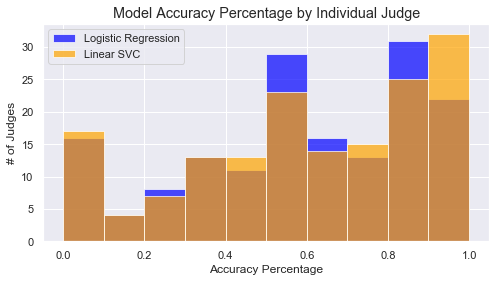

In [6]:
# graph the distribution of models' accuracy by individual judge
_ = sns.set()
_ = plt.figure(figsize=(8,4))
_ = plt.hist(df_groupby['accurate_lr'], histtype='bar', alpha=0.7, color='blue')
_ = plt.hist(df_groupby['accurate_svc'], histtype='bar', alpha=0.7, color='orange')
_ = plt.title('Model Accuracy Percentage by Individual Judge', size='large')
_ = plt.xlabel('Accuracy Percentage')
_ = plt.ylabel('# of Judges')
_ = plt.legend(['Logistic Regression', 'Linear SVC'], loc='upper left')
_ = plt.show()

The distribution is quite informative.  As a threshold matter, it appears that both of our models are producing similar distributions overall, with the Linear SVC model producing approximately ten more judges with an accuracy rate 90% or greater.

Both models produce distributions with three local maximums: a group of approximately 60 judges in which the models produce highly accurate results, a group of approximately 25 judges in which the models produce an accuracy of 50-60%, and a group of approximately 15 judges in which the models produce an accuracy of 10% or less.

I will now investigate to see what I can learn about this wide discrepancy in performance.

### Number of Opinions Per Judge

The first area I will investigate is whether the number of opinions in the test set for each judge is influencing the results.  Below, I graph the number of opinions of each judge in the test set along with the accuracy percentage for each judge produced by both models.  Because there were two labels that had a considerably greater number in the test set ('per_curiam' and 'clark_walter'), I removed these from the below graph so that I could scale the graph to get a more meaningful result.  (NOTE: Both models produced very high accuracy numbers for both of those categories).

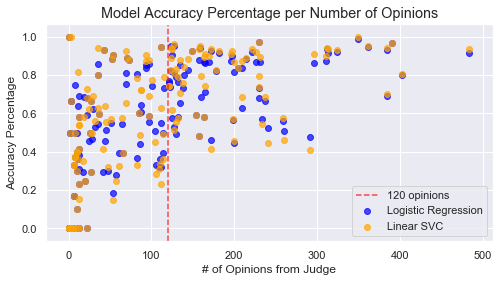

In [59]:
# Remove the high volume labels for scaling purposes
df_temp = df_groupby[df_groupby['opinion_count'] < 500]

# graph the accuracy percentages based on number of opinions per judge
_ = sns.set()
_ = plt.figure(figsize=(8,4))
_ = plt.scatter(df_temp['opinion_count'], df_temp['accurate_lr'], alpha=0.7, color='blue')
_ = plt.scatter(df_temp['opinion_count'], df_temp['accurate_svc'], alpha=0.7, color='orange')
_ = plt.axvline(x=120, linestyle='--', color='red', alpha=0.7)
_ = plt.title('Model Accuracy Percentage per Number of Opinions', size='large')
_ = plt.xlabel('# of Opinions from Judge')
_ = plt.ylabel('Accuracy Percentage')
_ = plt.legend(['120 opinions', 'Logistic Regression', 'Linear SVC'], loc='best')
_ = plt.show()

This graph demonstrates that the models achieve a minimum accuracy score of 0.40 for any judge that has at least 120 written opinions in the test set.  This is encouraging, as it shows that the models are adept at identifying some sort of signal in the text of a judge's opinions so long as it has a large enough sample size.  And, in fact, the graph demonstrates that often times the models are able to identify some meaningful signal even if a judge's opinion sample size is less than 120.

Let's remove the judges that produced an accuracy below 0.40 and re-evaluate the distribution:

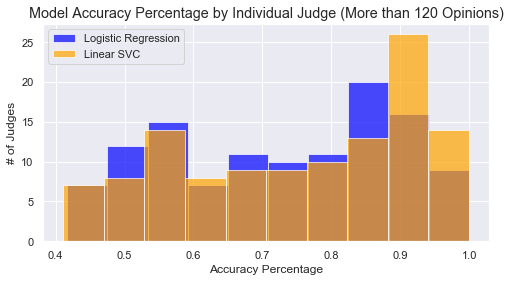

In [81]:
# remove judges with less than 120 opinions in the test set
df_opinions = df_groupby[(df_groupby['accurate_svc'] > 0.40) & (df_groupby['accurate_lr'] > 0.40)]

# graph the distribution of models' accuracy by individual judge
_ = sns.set()
_ = plt.figure(figsize=(8,4))
_ = plt.hist(df_opinions['accurate_lr'], histtype='bar', alpha=0.7, color='blue')
_ = plt.hist(df_opinions['accurate_svc'], histtype='bar', alpha=0.7, color='orange')
_ = plt.title('Model Accuracy Percentage by Individual Judge (More than 120 Opinions)', size='large')
_ = plt.xlabel('Accuracy Percentage')
_ = plt.ylabel('# of Judges')
_ = plt.legend(['Logistic Regression', 'Linear SVC'], loc='upper left')
_ = plt.show()

While both models perform well on a considerable portion of the remaining pool of judges (with the Linear SVC model outperforming the Logistic Regression model on the high end), there still is over 30 judges that produce an accuracy lower than 0.60.

Let's see what else we can learn about the models' performance.  First, I will re-create the number of opinions graph:

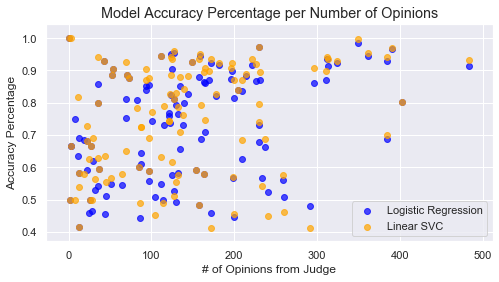

Pearson correlation coefficient (Logistic Regression): 0.28993114216460114
Pearson correlation coefficient (Linear SVC): 0.23835028161794186


In [86]:
# Remove the high volume labels for scaling purposes
df_temp= df_opinions[df_opinions['opinion_count'] < 500]

# graph the accuracy percentages based on number of opinions per judge
_ = sns.set()
_ = plt.figure(figsize=(8,4))
_ = plt.scatter(df_temp['opinion_count'], df_temp['accurate_lr'], alpha=0.7, color='blue')
_ = plt.scatter(df_temp['opinion_count'], df_temp['accurate_svc'], alpha=0.7, color='orange')
_ = plt.title('Model Accuracy Percentage per Number of Opinions', size='large')
_ = plt.xlabel('# of Opinions from Judge')
_ = plt.ylabel('Accuracy Percentage')
_ = plt.legend(['Logistic Regression', 'Linear SVC'], loc='best')
_ = plt.show()

print('Pearson correlation coefficient (Logistic Regression): {}'.format(np.corrcoef(df_opinions['opinion_count'], df_opinions['accurate_lr'])[0, 1]))
print('Pearson correlation coefficient (Linear SVC): {}'.format(np.corrcoef(df_opinions['opinion_count'], df_opinions['accurate_svc'])[0, 1]))

The graph demonstrates that both models produce mixed results until the sample size of opinions eclipses 300, in which case performance improves.  The Pearson correlation coefficients of 0.28 and 0.23, respectively, confirms that the number of opinions is slightly positively correlated.

### Average Word Count per Opinion

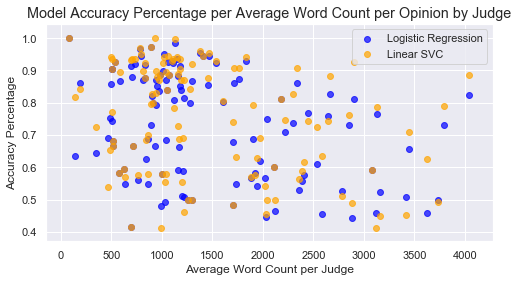

Pearson correlation coefficient (Logistic Regression): -0.3575672392738484
Pearson correlation coefficient (Linear SVC): -0.3156747786731042


In [96]:
# graph the accuracy percentages based on average word count per judge
_ = sns.set()
_ = plt.figure(figsize=(8,4))
_ = plt.scatter(df_opinions['word_count'], df_opinions['accurate_lr'], alpha=0.7, color='blue')
_ = plt.scatter(df_opinions['word_count'], df_opinions['accurate_svc'], alpha=0.7, color='orange')
_ = plt.title('Model Accuracy Percentage per Average Word Count per Opinion by Judge', size='large')
_ = plt.xlabel('Average Word Count per Judge')
_ = plt.ylabel('Accuracy Percentage')
_ = plt.legend(['Logistic Regression', 'Linear SVC'], loc='best')
_ = plt.show()

print('Pearson correlation coefficient (Logistic Regression): {}'.format(np.corrcoef(df_opinions['word_count'], df_opinions['accurate_lr'])[0, 1]))
print('Pearson correlation coefficient (Linear SVC): {}'.format(np.corrcoef(df_opinions['word_count'], df_opinions['accurate_svc'])[0, 1]))

Interestingly, it appears that the model performance did not improve based on the average number of words a judge used in his or her opinions.  In fact, the Pearson correlation coefficient suggests that the models' performance decreased as the judge's average word count per opinion increased.

### Average Number of Sentences per Opinion

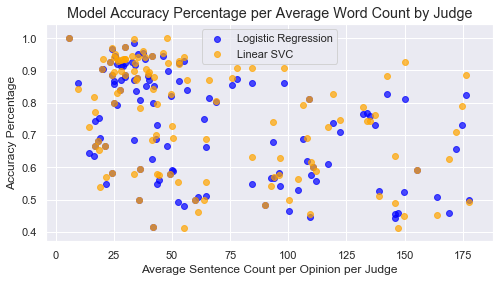

Pearson correlation coefficient (Logistic Regression): -0.4584591111136079
Pearson correlation coefficient (Linear SVC): -0.3879253712808552


In [97]:
# graph the accuracy percentages based on average sentence count per judge
_ = sns.set()
_ = plt.figure(figsize=(8,4))
_ = plt.scatter(df_opinions['sentence_count'], df_opinions['accurate_lr'], alpha=0.7, color='blue')
_ = plt.scatter(df_opinions['sentence_count'], df_opinions['accurate_svc'], alpha=0.7, color='orange')
_ = plt.title('Model Accuracy Percentage per Average Word Count by Judge', size='large')
_ = plt.xlabel('Average Sentence Count per Opinion per Judge')
_ = plt.ylabel('Accuracy Percentage')
_ = plt.legend(['Logistic Regression', 'Linear SVC'], loc='best')
_ = plt.show()

print('Pearson correlation coefficient (Logistic Regression): {}'.format(np.corrcoef(df_opinions['sentence_count'], df_opinions['accurate_lr'])[0, 1]))
print('Pearson correlation coefficient (Linear SVC): {}'.format(np.corrcoef(df_opinions['sentence_count'], df_opinions['accurate_svc'])[0, 1]))

Similar to word count, it appears that the models both performed worse as the average number of sentences per opinion increased.  Let's see if we get a similar result from average sentence lenghth:

### Average Sentence Length per Opinion

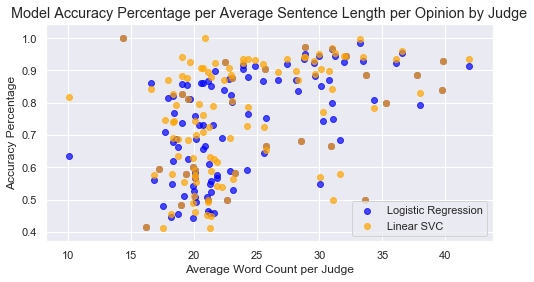

Pearson correlation coefficient (Logistic Regression): 0.4909574447484058
Pearson correlation coefficient (Linear SVC): 0.38431717487223266


In [103]:
# graph the accuracy percentages based on average sentence length per judge
_ = sns.set()
_ = plt.figure(figsize=(8,4))
_ = plt.scatter(df_opinions['avg_sent_length'], df_opinions['accurate_lr'], alpha=0.7, color='blue')
_ = plt.scatter(df_opinions['avg_sent_length'], df_opinions['accurate_svc'], alpha=0.7, color='orange')
_ = plt.title('Model Accuracy Percentage per Average Sentence Length per Opinion by Judge', size='large')
_ = plt.xlabel('Average Word Count per Judge')
_ = plt.ylabel('Accuracy Percentage')
_ = plt.legend(['Logistic Regression', 'Linear SVC'], loc='best')
_ = plt.show()

print('Pearson correlation coefficient (Logistic Regression): {}'.format(np.corrcoef(df_opinions['avg_sent_length'], df_opinions['accurate_lr'])[0, 1]))
print('Pearson correlation coefficient (Linear SVC): {}'.format(np.corrcoef(df_opinions['avg_sent_length'], df_opinions['accurate_svc'])[0, 1]))

The models clearly produced a positive correlation between average sentence length of opinion and the resulting accuracy.  So, while the models perform better on opinions with shorter overall word counts and number of sentences, it actually does better with longer individual sentences within an opinion.  Next, I will graph the models' respective performance based on year of the opinions.

### Model Performance Based on Year of Decision

I will now graph how the models performed based on the year of the opinion:

In [7]:
# create a dataframe grouping test set results by year
df_year = df_test.groupby('year').mean()
df_year['num_opinions'] = df_test['year'].value_counts()
df_year

,id,judge_count,word_count,sentence_count,avg_sent_length,polarity,subjectivity,accurate_lr,accurate_svc,num_opinions
year,,,,,,,,,,
1779,1.195830e+07,6440.000000,263.000000,5.000000,52.600000,0.032813,0.486458,0.000000,0.000000,1
1789,1.212179e+07,6440.000000,33.000000,1.000000,33.000000,0.000000,0.000000,0.000000,0.000000,1
1790,8.683650e+06,23.000000,728.000000,52.000000,14.000000,0.160507,0.398913,0.000000,1.000000,1
1791,8.683936e+06,23.000000,37.000000,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,1
1792,8.684810e+06,6440.000000,121.000000,9.000000,13.500000,-0.003125,0.461458,1.000000,1.000000,2
...,...,...,...,...,...,...,...,...,...,...
2013,4.785793e+06,895.057554,3124.776978,145.158273,20.678203,0.021622,0.379518,0.611511,0.633094,139
2014,8.858229e+06,881.056604,3611.735849,162.537736,20.915751,0.031767,0.380421,0.556604,0.603774,106
2015,1.183463e+07,1581.627907,1019.279070,44.837209,13.992832,0.042920,0.232756,0.697674,0.720930,43


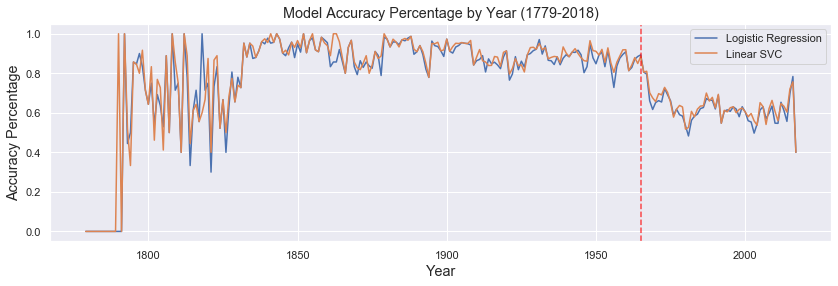

In [10]:
# graph the models accuracy percentage based on year of opinion
_ = sns.set()
_ = plt.figure(figsize=(14, 4))
_ = plt.plot(df_year.index, df_year['accurate_lr'])
_ = plt.plot(df_year.index, df_year['accurate_svc'])
_ = plt.axvline(x=1965, linestyle='--', color='red', alpha=0.7)
_ = plt.title('Model Accuracy Percentage by Year (1779-2018)', size='large')
_ = plt.xlabel('Year', size='large')
_ = plt.ylabel('Accuracy Percentage', size='large')
_ = plt.legend(['Logistic Regression', 'Linear SVC'], loc='best')
_ = plt.show()

Both models experienced a sharp decline in performance starting in approximately 1965 and then stabilizing at a 55-65% accuracy rate thereafter.  I know from my exploratory data analysis that this time period correlates directly with a sharp increase in the volume of yearly decisions issued in the dataset.  There also was an increase in the average length of court opinions during this time period.  This seems to indicate that the models' performance suffers as the volume of decisions within a particular year and/or the volume of words per decision increases.

I will now dig a bit deeper to see if I can glean any more information about what may be causing the sharp decline in the performance of the models.

## Model Coefficient Values

I will first divide the data into two separate groups: decisions from the 1850-1965 time frame and post-1965 decisions (using the average decision date per judge provided in the `df_groupby` dataframe).  I then can calculate the average coefficient values for each group for each model and compare which features were assigned the highest average coefficient values for each group for each model.

In [11]:
# ensure that the df_groupby dataframe is sorted by judge alphabetically (to line up with the coefficient value dataframes)
df_groupby.sort_index()

,id,judge_count,year,word_count,sentence_count,avg_sent_length,polarity,subjectivity,accurate_lr,accurate_svc
judge,,,,,,,,,,
adams,8.598351e+06,857.0,1926.939252,1164.266355,39.752336,29.609116,0.033573,0.405869,0.883178,0.887850
allen,9.942601e+06,821.0,1915.482927,1055.687805,27.795122,39.751943,0.053329,0.428904,0.839024,0.839024
arnold,8.734457e+06,1167.0,1983.513699,991.993151,55.222603,17.573123,0.040142,0.414981,0.479452,0.410959
arrowood,5.004099e+06,40.0,2007.800000,3662.100000,193.700000,19.190382,0.022930,0.383157,0.100000,0.100000
ashe,9.723536e+06,634.0,1882.465409,791.037736,25.477987,29.931235,0.069055,0.445665,0.943396,0.949686
...,...,...,...,...,...,...,...,...,...,...
whichard,6.008380e+06,661.0,1986.521212,2221.478788,122.145455,17.738289,0.027919,0.406683,0.709091,0.745455
whitlock,1.214105e+07,7.0,1793.000000,599.500000,40.000000,12.823333,-0.022289,0.378966,0.000000,0.000000
williams,9.806858e+06,23.0,1793.833333,349.333333,15.333333,27.951754,0.056557,0.300397,0.333333,0.333333


In [24]:
# load the coefficient value dataframes from local files
df_lr_coef = pd.read_csv('df_lr_coef.csv', index_col=0)
df_svc_coef = pd.read_csv('df_svc_coef.csv', index_col=0)

# add the average opinion year from df_groupby dataframe to coefficient values dataframes
df_lr_coef['avg_year'] = df_groupby.loc[:, 'year']
df_svc_coef['avg_year'] = df_groupby.loc[:, 'year']

# divide the dataframes in 1850-1965 decisions and post-1965 decisions
df_lr_coef_classic = df_lr_coef[(df_lr_coef['avg_year'] > 1865) & (df_lr_coef['avg_year'] < 1965)]
del df_lr_coef_classic['avg_year']
df_lr_coef_modern = df_lr_coef[df_lr_coef['avg_year'] >= 1965]
del df_lr_coef_modern['avg_year']

df_svc_coef_classic = df_svc_coef[(df_svc_coef['avg_year'] > 1865) & (df_svc_coef['avg_year'] < 1965)]
del df_svc_coef_classic['avg_year']
df_svc_coef_modern = df_svc_coef[df_svc_coef['avg_year'] >= 1965]
del df_svc_coef_modern['avg_year']

### Logistic Regression Coefficient Values

In [30]:
# create the highest coefficient values list for the classic lr dataframe
df_describe = df_lr_coef_classic.describe()
df_describe = df_describe.transpose().sort_values(by='mean', ascending=False)
lr_classic = list(df_describe.index[:30])
print(lr_classic)

['tbe', 'spacy_9', 'avg_sent_length', 'appeals', 'in', 'was', 'hence', 'spacy_263', 'spacy_227', 'spacy_277', 'spacy_152', 'decision', 'spacy_163', 'cited', 'year_1957', 'year_1956', 'year_1959', 'spacy_201', 'year_1892', 'year_1939', 'year_1955', 'year_1940', 'year_1961', 'year_1941', 'year_1938', 'year_1960', 'year_1893', 'dissenting', 'year_1909', 'year_1942']


In [31]:
# create the highest coefficient values list for the modern lr dataframe
df_describe = df_lr_coef_modern.describe()
df_describe = df_describe.transpose().sort_values(by='mean', ascending=False)
lr_modern = list(df_describe.index[:30])
print(lr_modern)

['sentence_count', 'word_count', 'defendant', 'app', 'year_1980', 'spacy_17', 'year_1979', 'concur', 'year_1983', 'year_1982', '2d', 'spacy_85', 'year_1981', 'spacy_179', 'year_1985', 'spacy_140', 'year_1984', 'year_1993', 'trial', 'year_1976', 'that', 'year_1978', 'spacy_102', 'year_1990', 'judges', 'year_1987', 'year_1986', 'spacy_113', 'year_1988', 'spacy_8']


### Linear SVC Coefficient Values

In [32]:
# create the highest coefficient values list for the classic svc dataframe
df_describe = df_svc_coef_classic.describe()
df_describe = df_describe.transpose().sort_values(by='mean', ascending=False)
svc_classic = list(df_describe.index[:30])
print(svc_classic)

['the', 'of', 'court', 'spacy_227', 'that', 'spacy_248', 'spacy_208', 'spacy_286', 'spacy_140', 'tbe', 'was', 'spacy_60', 'spacy_163', 'spacy_67', 'spacy_240', 'spacy_205', 'tax', 'spacy_121', 'spacy_45', 'they', 'spacy_278', 'spacy_239', 'to', 'spacy_231', 'spacy_263', 'then', 'spacy_55', 'spacy_298', 'spacy_190', 'spacy_75']


In [33]:
# create the highest coefficient values list for the modern svc dataframe
df_describe = df_svc_coef_modern.describe()
df_describe = df_describe.transpose().sort_values(by='mean', ascending=False)
svc_modern = list(df_describe.index[:30])
print(svc_modern)

['the', 'that', 'of', 'spacy_87', 'spacy_298', 'spacy_46', 'spacy_248', 'spacy_26', 'spacy_59', 'spacy_124', 'spacy_113', 'spacy_60', 'year_1990', 'spacy_3', 'year_2006', 'spacy_67', 'year_1997', 'year_1979', 'year_2001', 'year_1983', 'year_1993', 'year_1995', 'year_1978', 'year_1991', 'trial', 'year_1989', 'year_1992', 'you', 'year_1996', 'decedent']


### Coefficient Values Results

In [34]:
# the top 30 features by coefficient value for each model
df_results = pd.DataFrame({'lr_classic': lr_classic, 'lr_modern': lr_modern, 'svc_classic': svc_classic, 'svc_modern': svc_modern})
df_results

,lr_classic,lr_modern,svc_classic,svc_modern
0,tbe,sentence_count,the,the
1,spacy_9,word_count,of,that
2,avg_sent_length,defendant,court,of
3,appeals,app,spacy_227,spacy_87
4,in,year_1980,that,spacy_298
5,was,spacy_17,spacy_248,spacy_46
6,hence,year_1979,spacy_208,spacy_248
7,spacy_263,concur,spacy_286,spacy_26
8,spacy_227,year_1983,spacy_140,spacy_59
9,spacy_277,year_1982,tbe,spacy_124


For the Linear Regression model, it appears that it was able to identify the older decisions at a higher rate by labeling a few key words and spacy vector values with the highest coefficient values.  It also placed importance on the decision year, with particular years making up roughly half of the top 30 coefficient values.  For the more recent decisions, it appears that the model labeled the word count and sentence count features as most important, with the spacy vector values not as important as for the older opinions.  Approximately half of the features were particular years for the more recent decisions as well, demonstrating that the logistic regression model found signal in the year a decision was issued.

As for the Linear SVC model, it interestingly did not have a single year feature in its top 30 coefficient values for the older decisions.  It prioritized the spacy vector values primarily, with a few word features sprinkled in.  The model also prioritized spacy vector values for the more recent decisions, but it also included a number of particular year features for those opinions (unlike the older decisions).  Given that the model performed better at identifying judicial authorship for the older decisions, it appears likely that the Linear SVC model is identifying more signal in the substance of the opinions (which the spacy vectors represent) rather than the year an opinion is issued.

### Individual Judge Word Usage

Next, I have selected at random three pre-1965 judges (Barnhill, Higgins, Varser) and three post-1965 judges (Erwin, Hudson, Stephens) to analyze to see if I can uncover any observable distinctions in their word usage.  I will start by generating word clouds for each judge's set of opinions.  To do this, I will need to create string variables containing all of the opinions for each judge and then feed those strings into the `WordCloud` model.

### Word Clouds

In [52]:
# create string variables for the text of the opinions for each judge
barnhill_text = ''
higgins_text = ''
varser_text = ''
erwin_text = ''
hudson_text = ''
stephens_text = ''
from tqdm import tqdm
for row in tqdm(range(len(df_model))):
    if df_model.loc[row, 'judge'] == 'barnhill':
        barnhill_text += ' ' + df_model.loc[row, 'opinion']
    elif df_model.loc[row, 'judge'] == 'higgins':
        higgins_text += ' ' + df_model.loc[row, 'opinion']
    elif df_model.loc[row, 'judge'] == 'varser':
        varser_text += ' ' + df_model.loc[row, 'opinion']
    elif df_model.loc[row, 'judge'] == 'erwin':
        erwin_text += ' ' + df_model.loc[row, 'opinion']
    elif df_model.loc[row, 'judge'] == 'hudson':
        hudson_text += ' ' + df_model.loc[row, 'opinion']
    elif df_model.loc[row, 'judge'] == 'stephens':
        stephens_text += ' ' + df_model.loc[row, 'opinion']

100%|█████████████████████████████████████████████████████████████████████████| 80749/80749 [00:06<00:00, 12475.13it/s]


In [56]:
# lowercase the opinion texts
barnhill_text = barnhill_text.lower()
higgins_text = higgins_text.lower()
varser_text = varser_text.lower()
erwin_text = erwin_text.lower()
hudson_text = hudson_text.lower()
stephens_text = stephens_text.lower()

# create stop words list for wordcloud
stop_words = ['barnhill', 'higgins', 'varser', 'erwin', 'hudson', 'stephens', 'judge', 'justice']

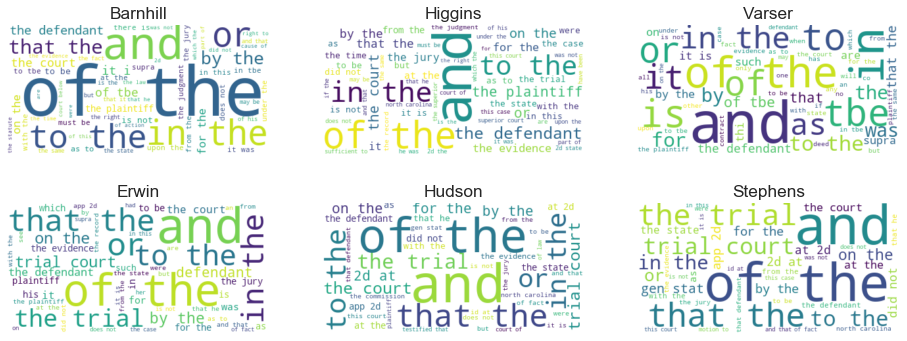

In [69]:
# create wordclouds for each judge using WordCloud

# import WordCloud
from wordcloud import WordCloud

#instantiate a WordCloud instance with relevant arguments
wc = WordCloud(stopwords=stop_words, background_color='white', min_font_size=8, random_state=6)

# create relevant lists to use in below for loop
opinions = [barnhill_text, higgins_text, varser_text, erwin_text, hudson_text, stephens_text]
full_names = ['Barnhill', 'Higgins', 'Varser', 'Erwin', 'Hudson', 'Stephens']

# plot the wordcloud for each judge (older three judges in first row, modern three judges in second row)
_ = sns.set()
_ = plt.figure(figsize=(16,6))
for index, judge in enumerate(opinions):
    wc.generate(judge)
    _ = plt.subplot(2, 3, index+1)
    _ = plt.imshow(wc, interpolation='bilinear')
    _ = plt.axis('off')
    _ = plt.title(full_names[index], size='x-large')

Interestingly, it appears that all six judges use by and large the same words most often in their respective opinions.  A substantial amount of the most frequent words appear to be common english stop words.  Let's see if I get more meaningful results if I recreate the word clouds and exclude the traditional english language stop words:

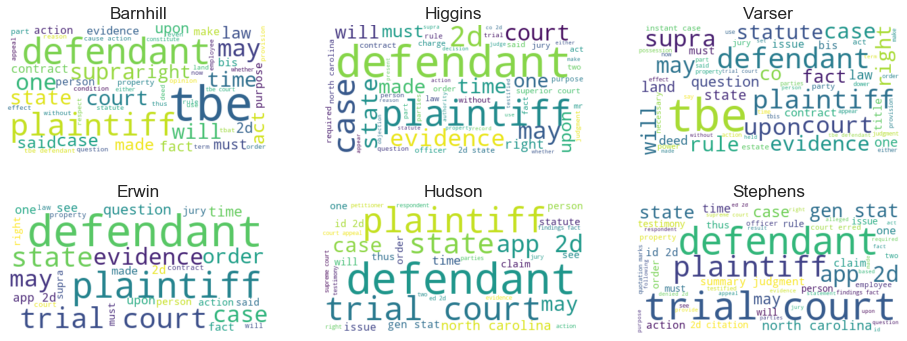

In [66]:
# recreate word clouds with default english language stop words list
from wordcloud import WordCloud

wc = WordCloud(background_color='white', min_font_size=8, random_state=6)

opinions = [barnhill_text, higgins_text, varser_text, erwin_text, hudson_text, stephens_text]
full_names = ['Barnhill', 'Higgins', 'Varser', 'Erwin', 'Hudson', 'Stephens']

_ = sns.set()
_ = plt.figure(figsize=(16,6))
for index, judge in enumerate(opinions):
    wc.generate(judge)
    _ = plt.subplot(2, 3, index+1)
    _ = plt.imshow(wc, interpolation='bilinear')
    _ = plt.axis('off')
    _ = plt.title(full_names[index], size='x-large')

Even when excluding traditional stop words, the most common word usage for each of the six judges seems to overlap substantially with traditional legal words (e.g., plaintiff, defendant, court, trial, state, case, etc.).  This makes sense from a practical standpoint and also provides some indication as to why more individual word features didn't receive the larger coefficient values (i.e., were not prioritized by the models).

Lastly, I will build a chart demonstrating the 20 words that received the highest cumulative tfidf value for each judge.  Perhaps that will provide more meaningful results.

### Highest Tfidf Word Values

In [3]:
# Import the tfidf values from local .csv file
df_tfidf = pd.read_csv('df_tfidf_02.csv', index_col=0)

In [5]:
# group the data by judge, calculate the cumulative values for each word per judge, and display the top 20 words for each judge in dataframe
df_judge = df_tfidf.groupby('judge').sum()
df_transpose = df_judge.transpose()
df_results = pd.DataFrame({'Barnhill': df_transpose.sort_values(by='barnhill', ascending=False).index[:20], 'Higgins': df_transpose.sort_values(by='higgins', ascending=False).index[:20], 'Varser': df_transpose.sort_values(by='varser', ascending=False).index[:20], 'Erwin': df_transpose.sort_values(by='erwin', ascending=False).index[:20], 'Hudson': df_transpose.sort_values(by='hudson', ascending=False).index[:20], 'Stephens': df_transpose.sort_values(by='stephens', ascending=False).index[:20]})
df_results

,Barnhill,Higgins,Varser,Erwin,Hudson,Stephens
0,the,the,the,the,the,the
1,of,of,tbe,of,of,of
2,tbe,to,of,to,to,to
3,to,and,to,and,and,and
4,and,in,in,in,that,that
5,in,is,and,that,in,in
6,is,that,is,defendant,defendant,defendant
7,that,was,that,is,court,court
8,it,2d,it,2d,2d,2d
9,was,for,not,was,for,on


Similar to the word cloud results, the words with the highest tfidf values overlap substantially between the six judges and almost exclusively consist of either common stop words or classic legal jargon.  It appears to be pretty definitive at this point that the models were able to identify more signal in the non-individual word features than the individual word tfidf features to identify judicial authorship.

## Summary/Conclusions

In this project, I was able to build two models that could identify the judicial author of a court opinion at an overall accuracy rate of approximately 75% and 76%, respectively.  Given that the models had a pool of over 160 judges to choose from, generating accuracy rates as high as 75% indicates that the models were successfully able to learn some meaningful distinctions between each of the judges' particular written opinions.

Overall, this project demonstrates that attempting to build machine learning models to identify judicial authorship of case decisions is a worthwhile endeavor that can provide real, tangible value to the legal industry.  The particular use cases for such a model are many.  For example, a practitioner could use a model to analyze a brief to be filed in order to see which judge or judges the text of the brief most resembles.  One could also feed opinions of a particular judge that were not used during training into the model to see which judge or judges the model finds to be most similar.  Or a practicing attorney could even simply perform some deeper analysis on the results of a fully-trained model to uncover more details about a particular judge (e.g., common word usage, grammatical patterns, etc.).  The potential for accurate judicial authorship classifiers really is substantial.

The following are some more specific conclusions I reached about the particular models I built in this project:

-  The Linear SVC model slightly outperformed the Linear Regression Classifier by producing an accuracy rate of 90% or higher for substantially more judges and, therefore, is the model I would recommend;


-  Both models were able to produce a minimum accuracy percentage of 40% for all judges in which they received a large enough sample size of opinions, and both models' performance was directly positively correlated with the number of opinions for a particular judge.  This demonstrates that both models very likely were able to extract real, tangible signal from the features used to train the models;


-  Both models experienced a significant dropoff in performance as the number of judges issuing opinions in a particular year increased.  During this same time period, the average number of words and sentences per decision increased, and the average sentence length decreased, significantly.  It is unclear which of these trends (or combination of trends) was the cause of the model performance dropoff (though if I had to venture a guess, it most likely is the increase in the number of judges issuing opinions within the same year);


-  Both models on average assigned higher coefficient values to the non-individual word features.  The higher-performing Linear SVC model placed a greater importance on the spacy vector values, indicating that it was likely able to glean some signal from the particular substance of the text opinions; and


-  There was substantial overlap among the most frequent and/or important words identified by the models for each particular judge, which likely explains why on average the individual word features were assigned less significant coefficient values.

## Future Project Work

While I was able to build two high-performing judicial authorship classifiers, I believe that I could improve the models (the Linear SVC model in particular) through future work to provide even more meaningful results.  I believe the following future work could improve the models:

-  **Building a More Precise Corpus Vocabulary.**  Analyzing the results of the models showed that they were not identifying a distinct vocabulary for any particular judge.  I believe it would be worthwhile to spend time crafting the particular vocabulary to be used in the model, such as eliminating traditional stop words, removing common legal jargon, and limiting the vocabulary to particular parts of speech (nouns, verbs, adjectives, etc.).  This could lead to more meaningful insights into a particular judge's opinion style;


-  **Removing the Year of the Opinion.**  While the year of the opinion very likely assisted model performance, it does not provide much meaningful insight for the likely use cases for this model.  It therefore may be beneficial to remove that feature from the dataset and require the models to use other features to identify judicial authorship; and


-  **Exploring the Meaning of the SpaCy Vector Values.**  The results indicated that both classifiers, and in particular the Linear SVC model, were able to identify signal from the SpaCy vectors to correctly identify judicial authorship.  I believe it would be worthwhile to unpack the SpaCy vector values to determine more specifically which portions of the opinion text the models were identifying as significant.  Being able to identify particular substantive distinctions among judges would be extremely valuable to the likely users of the models.